In [1]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

In [2]:
# Image directory
train_dir = "images/training/"
test_dir = "images/test/"

In [3]:
# Load datta dan Visualisasikan

def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('\\')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))
    
    return img_list

In [4]:
# Load data training
train_img = load_dataset(train_dir)

In [5]:
# Check the first data
# It should be a tuple consist of arrays of image and image labels
train_img[0]

(array([[[158, 194, 218],
         [158, 194, 218],
         [158, 194, 218],
         ...,
         [176, 209, 228],
         [177, 210, 229],
         [177, 210, 229]],
 
        [[158, 194, 218],
         [158, 194, 218],
         [158, 194, 218],
         ...,
         [180, 213, 232],
         [180, 213, 232],
         [180, 213, 232]],
 
        [[158, 194, 218],
         [158, 194, 218],
         [158, 194, 218],
         ...,
         [177, 210, 229],
         [177, 210, 229],
         [177, 210, 229]],
 
        ...,
 
        [[ 35,  40,  43],
         [ 38,  43,  46],
         [ 39,  44,  47],
         ...,
         [ 65,  73,  75],
         [ 65,  73,  75],
         [ 65,  73,  75]],
 
        [[ 36,  41,  44],
         [ 38,  43,  46],
         [ 39,  44,  47],
         ...,
         [ 68,  76,  78],
         [ 68,  76,  78],
         [ 65,  73,  75]],
 
        [[ 37,  41,  44],
         [ 38,  43,  46],
         [ 39,  44,  47],
         ...,
         [ 68,  76,  78],
  

In [6]:
# Random Size Checking
pick_random = random.randint(0, len(train_img))

# Check img size
print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)

Image 122
(737, 1024, 3)


In [7]:
# Fungction to visualize the image
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == '1' else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

Shape	: (737, 1024, 3)
Label	: night


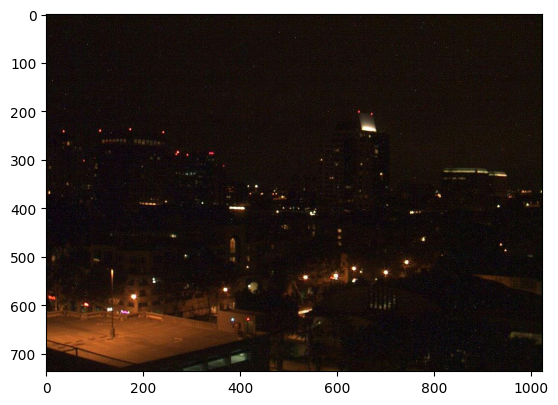

In [8]:
# Lakukan Visualisasi gambar acak
random_img_viz(train_img)

In [9]:
# Pra Pengolahan Data

def standardize_input(image):
    # Resize to w : 1100, h : 600
    std_img = cv2.resize(image, (1100, 600))

    return std_img

In [12]:
# Fungsi untuk encoding

def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if label == 'day':
        num_val = 1

    return num_val


In [13]:
# Fungsi Menggabungkan 2 hal sekaligus
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standardize the image
        std_img = standardize_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))
        
    return std_img_list

In [14]:
# Pra pengolahan data pada data training
train_std_img_list = preprocess(train_img)

In [15]:
# Pengecekan ukuran gambar

# Random Size Checking
pick_random = np.random.randint(0, len(train_std_img_list))

# Check img size
print(f'Image {pick_random}')
print(train_std_img_list[pick_random][0].shape)

Image 231
(600, 1100, 3)


Shape	: (600, 1100, 3)
Label	: 1


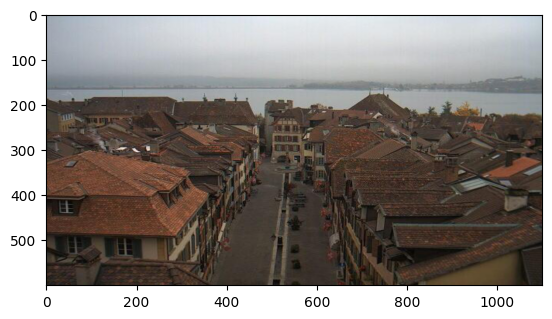

In [16]:
# Inpeksi visual dengan fungsi random_img_viz

random_img_viz(train_std_img_list)

In [17]:
# Ekstraksi Fitur

# Fungsi untuk mendapatkan nilai rata rata kecerahan
def avg_brightness(image):
    # Convert RGB ke HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Hitung kecerahan
    sum_brightness = np.sum(img_hsv[:,:,2])
    area = image.shape[0] * image.shape[1]

    # Hitung nilai rata-rata kecerahan
    avg = sum_brightness / area

    return avg

Image 194
Average Brightness	: 99.0969


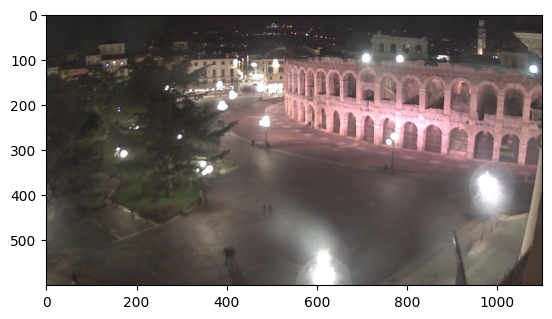

In [18]:
# Pengecekan pada gambar secara acak

# Check on random image

rand_img = np.random.randint(0, len(train_std_img_list))

feature_img = train_std_img_list[rand_img][0]

avg_img = avg_brightness(feature_img)

print(f'Image {rand_img}')
print(f'Average Brightness\t: {avg_img:.4f}')
plt.imshow(feature_img)

In [19]:
# Klasifikasi dengan metode threshold

def predict_label(img, threshold):
    # Computer average brightness
    avg = avg_brightness(img)
    pred = 0

    # Predict the label
    if avg > threshold:
        pred = 1

    return pred

Image 161
Actual Label	: 0
Predicted Label	: 0


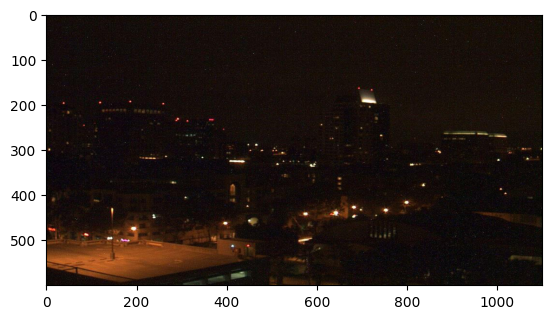

In [20]:
# Pengecekan Prediksi secara acak

# Test the clasifier on train data
rand_img = np.random.randint(0, len(train_std_img_list))

pred = predict_label(train_std_img_list[rand_img][0], threshold=120)

# Evaluate the prediction
print(f'Image {rand_img}')
print(f'Actual Label\t: {train_std_img_list[rand_img][1]}')
print(f'Predicted Label\t: {pred}')
plt.imshow(train_std_img_list[rand_img][0])

In [21]:
# Evaluasi Manual
def evaluate (img_list, threshold):
    miss_labels = []

    for file in img_list:
        # Get the ground truth / correct label
        img = file[0]
        label = file[1]

        # Get the predicted label
        pred_label = predict_label(img, threshold)

        if pred_label != label:
            miss_labels.append((img, label, pred_label))

    total_img = len(img_list)
    corr_pred = total_img - len(miss_labels)
    accuracy = corr_pred / total_img

    print(f'Accuracy\t: {accuracy:.4f}')

In [22]:
# Evaluate on train data
evaluate(train_std_img_list, threshold=120)

Accuracy	: 0.8417


In [23]:
# Evaluate on test data

# Load test data
test_img = load_dataset(test_dir)

# Preprocess the test data
test_std_img_list = preprocess(test_img)

# Predict on test data
evaluate(test_std_img_list, threshold=120)

Accuracy	: 0.8688


In [28]:
# Membuat Feature Vectors dan Klasifikasi dengan SVM

# Alternatif - Membuat Feature Vectors

# Create function to extract feature for every images and stored in tabular data
# Stored in Pandas dataframe
def extract_avg_bright_feature(img_list):
    avg_list = []
    labels = []

    for img in img_list:
        img_avg = avg_brightness(img[0]) # Get the avg brightness from image
        img_label = img[1] # Get the image label

        avg_list.append(img_avg)
        labels.append(img_label)
    
    # Stack data in columcular way
    data = np.column_stack((avg_list, labels))
    # Create a Pandas dataframe
    df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])

    return df

In [29]:
# Cek hasil pada data training

# Extract feature from train data
train_avg_img = extract_avg_bright_feature(train_std_img_list)
print(f'Shape: {train_avg_img.shape}')
train_avg_img.head()

Shape: (240, 2)


,AVG_BRIGHT,LABELS
0,175.129871,1.0
1,192.954773,1.0
2,132.141432,1.0
3,199.784797,1.0
4,109.964702,1.0


In [32]:
# Do to same thing on test data
test_avg_img = extract_avg_bright_feature(test_std_img_list)
print(f'Shape: {test_avg_img.shape}')
test_avg_img.head()

Shape: (160, 2)


,AVG_BRIGHT,LABELS
0,194.267453,1.0
1,157.844245,1.0
2,201.646592,1.0
3,191.273192,1.0
4,188.152729,1.0


In [35]:
# kita akan membuat model SVM dengan kernel RBF (default) dengan memanfaatkan libary scikit-learn.

# import required library
from sklearn.svm import SVC

# Split the data and label

X_train = train_avg_img.iloc[:,0].values.reshape(-1, 1)
y_train = train_avg_img.iloc[:,1].values
X_test = test_avg_img.iloc[:,0].values.reshape(-1, 1)
y_test = test_avg_img.iloc[:,1].values

model = SVC()
model.fit(X_train, y_train)


SVC()

In [36]:
# kita akan melakukan evaluasi pada data training dan testing dengan bantuan library scikit-learn.

from sklearn.metrics import accuracy_score

# Make a prediction on train data
y_train_pred = model.predict(X_train)

# Get the accuracy on train data
acc_train = accuracy_score(y_train, y_train_pred)

# Make a prediction on test data
y_test_pred = model.predict(X_test)

# Get the accuracy on test data
acc_test = accuracy_score(y_test, y_test_pred)

# Print Eval Result
print(f'Accuracy on Train Data\t: {acc_train:}')
print(f'Accuracy on Test Data\t: {acc_test:}')

Accuracy on Train Data	: 0.8583333333333333
Accuracy on Test Data	: 0.9
